**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Emiliano Palafox Ruiz
*   MATRÍCULA: A01796609


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd

air_df = pd.read_csv('LaqnData.csv')

In [2]:
print("El dataframe tiene la siguiente forma:", air_df.shape)

El dataframe tiene la siguiente forma: (43800, 6)


In [3]:
print("\nEl nombre de las columnas del dataframe son:\n",  air_df.columns)


El nombre de las columnas del dataframe son:
 Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')


In [4]:
print("\nLos primeros 5 registros del dataframe son:")
air_df.head()


Los primeros 5 registros del dataframe son:


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [5]:
print("\nLos últimos 5 registros del dataframe son:") 
air_df.tail()


Los últimos 5 registros del dataframe son:


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [6]:
print("\nTipos de datos por columna:\n",air_df.dtypes)


Tipos de datos por columna:
 Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object


In [7]:
percentage = (air_df.isnull().sum()/len(air_df))*100
print("\nPorcentaje de valores faltantes por columna:\n", percentage)


Porcentaje de valores faltantes por columna:
 Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [8]:
num_mediciones = air_df.groupby('ReadingDateTime')['Species'].nunique().sum()
print(f"Se hicieron un total de {num_mediciones} mediciones")

Se hicieron un total de 43800 mediciones


In [9]:
num_species = air_df['Species'].nunique()
print(f"Número de contaminantes encontrados: {num_species}")
unique_species = air_df['Species'].unique()
print(f"Los contaminantes encontrados fueron: {unique_species}")

Número de contaminantes encontrados: 5
Los contaminantes encontrados fueron: ['NO' 'NO2' 'NOX' 'PM10' 'PM2.5']


In [10]:
columns_equal = []
for col in air_df.columns:
    if air_df[col].nunique() == 1:
        columns_equal.append(col)
        
print(f"Las columnas que tienen exactamente el mismo valor son: {columns_equal}")

Las columnas que tienen exactamente el mismo valor son: ['Site', 'Provisional or Ratified']


Borramos las columnas 'Site' y 'Provisional or Ratified' pues poseen el mismo valor en todo el conjunto de datos

In [11]:
air_df = air_df.drop(['Site', 'Provisional or Ratified'], axis=1)

In [12]:
air_df.head()

,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3


In [13]:
unique_units = air_df['Units'].unique()
print(f"Valores únicos en la columna 'Units': {unique_units}")

Valores únicos en la columna 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']


La columna `'Units'` poseé tres categorías, sin embargo si observamos a detalle podemos identificar que esta variable no aporta valor al ser la misma categoría pero con distinto formato por lo que podemos eliminarla.

In [14]:
air_df = air_df.drop('Units', axis=1)

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [15]:
air_df['Species'].value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

El número total de mediciones es de 43,800 valores, y cada valor de la columna Species cuenta con 8,760 registros. Si multiplicamos 8,760 por 5 obtendremos el total de 43,800 observaciones

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [16]:
mean_species = air_df.groupby('Species')['Value'].mean()

print("Promedio del valor por contaminante:")
print(mean_species)

Promedio del valor por contaminante:
Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [17]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')

print("\nDataframe en formato largo (pvt_df):")
pvt_df.head()


Dataframe en formato largo (pvt_df):


Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [18]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


* La mayor cantidad de `NO2` registrado fue de 120.200000
* La menor cantidad de `PM10` registrado fue de -5.600000
* La mediana del `N0` es de 7.100000
* El primer cuartil del `PM2.5` es de 7.000000

In [19]:
max_NO2 = air_df[(air_df['Species'] == 'NO2') & (air_df['Value'] == 120.200000)]

print("Registro con el valor máximo de NO2:")
print(max_NO2)

Registro con el valor máximo de NO2:
     Species   ReadingDateTime  Value
9331     NO2  24/01/2017 19:00  120.2


In [20]:
min_PM10 = air_df[(air_df['Species'] == 'PM10') & (air_df['Value'] == -5.600000)]

print("Registro con el valor mínimo de PM10:")
print(min_PM10)

Registro con el valor mínimo de PM10:
      Species   ReadingDateTime  Value
32399    PM10  12/09/2017 23:00   -5.6


* #### La mediana del NO es de 7.1000. 
Este valor representa el punto exacto que divide la mitad de los datos, cómo podemos observar el valor máximo de esta variable es 401.799, por lo que, gracias a la mediana podemos inferir que hay outliers.
* #### El primer cuartil del PM2.5 es de 7.00:
Lo que nos indica que el 25% de las observaciones son menores o iguales a 7.00.

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

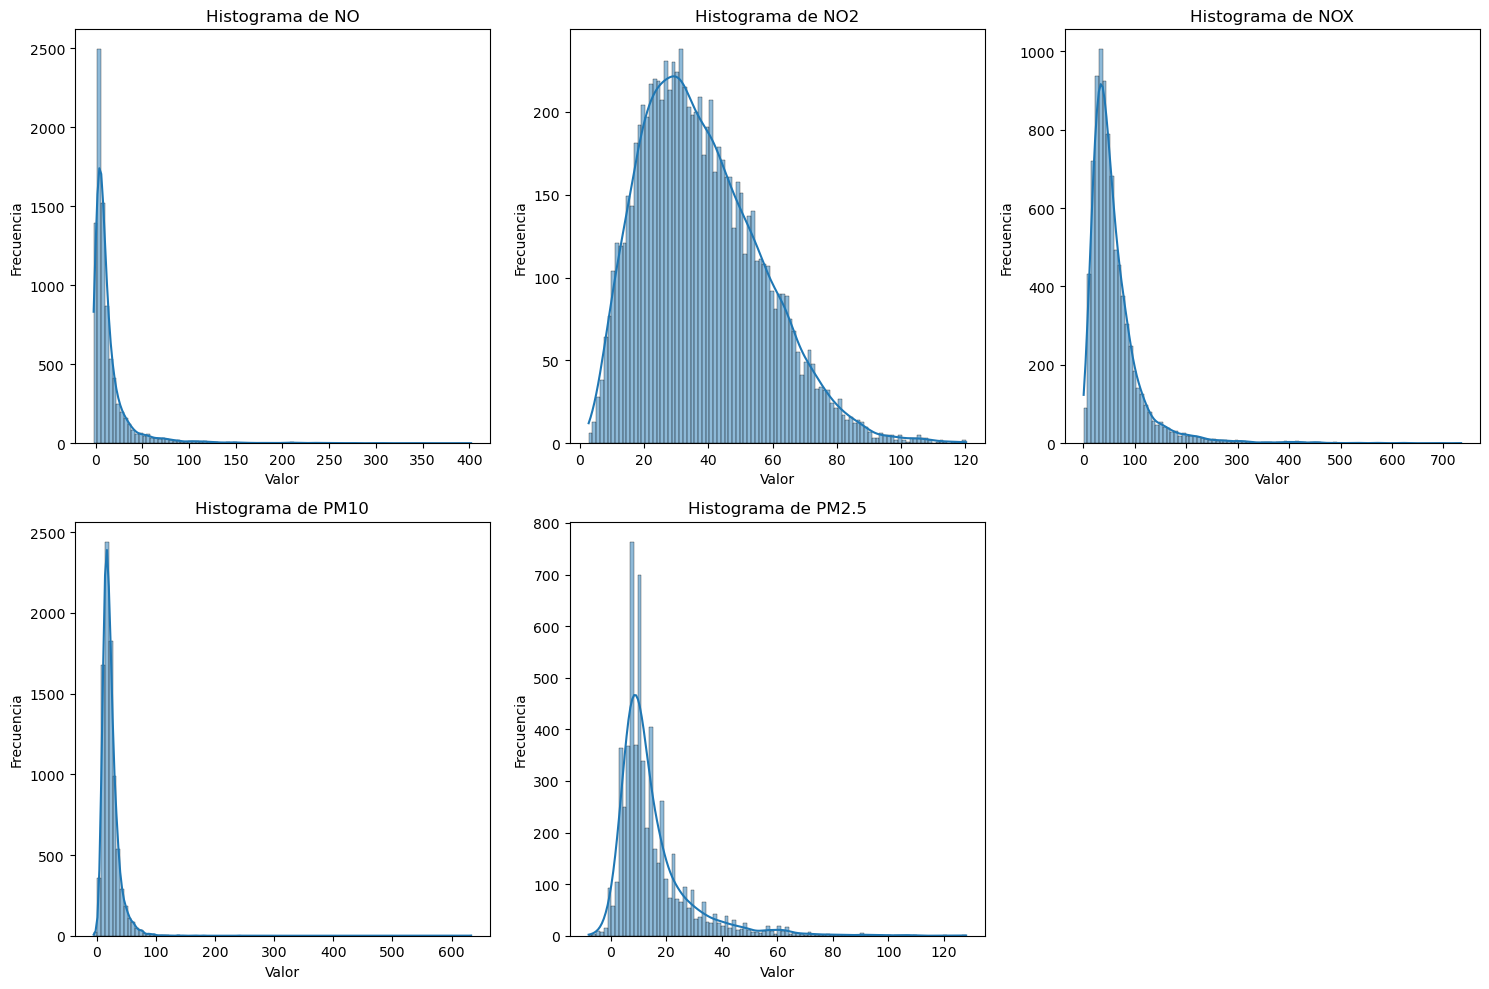

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10)) 

for i, column in enumerate(pvt_df.columns):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(pvt_df[column], kde=True, bins=100)
    plt.title(f"Histograma de {column}")
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

A través de los histogramas podemos darnos cuenta que la variable que presenta mayor variabilidad es la `N02`, esto debido a que su distribución cubre un rango más amplio de valores. 

Cabe recalcar que el resto de variables muestran un claro sesgo, pues la mayoría de los valores están en el extremo inferior (valores pequeños).

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [22]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) # Dividir la columna ReadingDateTime usando el ' ' como delimitador y lo guarda como 'datetime_df'
datetime_df.columns = ['Date','Time'] # Renombra las columnas de 'datetime_df' a 'Date' y 'Time'
datetime_df # Imprime el DF
date_df = datetime_df.Date.str.split('/',expand=True) # Divide la columna Date de 'datetime_df' usando el '/' como delimitador y lo guarda en 'date_df'
date_df.columns = ['Day','Month','Year'] # Renombra las columnas a 'Day', 'Month' y 'Year'
date_df # Imprime el DF
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) # Une el Dataframe original con date_df y datetime_df, y elimina las columnas 'ReadingDateTime' y 'Year'
air_df = air_df.set_index(['Month','Day','Time','Species']) # Establece las columnas 'Month','Day','Time','Species' como indice
air_df # Imprime el DF

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [23]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Los resultados no son iguales, en el primer código se genera un índice de mes, día, hora y especies, mientras que en el segundo resultado observamos que la columna Species se ha desglosado en varias columnas lo que facilita la comparación de las diversas categorías.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

La función `.unstack()` se aplica a una serie con un índice multinivel, produciendo un DataFrame en el cual las columnas corresponden al nivel externo del índice. Esta función desplaza el nivel exterior del índice multinivel a las columnas. Si el índice multinivel tiene solo dos niveles, tras ejecutar `.unstack()`, se convertirá en un índice de un solo nivel.

El opuesto de `.unstack()` es `.stack()`, que desplaza el nivel externo de las columnas hacia el índice, convirtiéndolo en el nivel externo del índice multinivel.

Por otro lado, la función `.melt()` transforma fácilmente un conjunto de datos del formato ancho al formato largo, mientras que la función `.pivot()` realiza la operación contraria, reformando un DataFrame desde el formato largo al formato ancho.

Si tuviera que elegir una contraparte para `.melt()` sería  `.unstack()`, pues ambas comparten la idea de transformar un Dataframe a un formato más largo.